In [2]:
import numpy as np
import matplotlib.pyplot as plt


import pandas as pd
import glob

import matplotlib.patches as mpatches
import matplotlib.colors as colors

In [3]:
# States
t = 0
S = 1
A = 2
P = 3
MI= 4
SI= 5
R = 6
H = 7

n_pop = 10000

beta015 = np.array(glob.glob('./MaskingData/beta0.15/T*.txt'))
beta017 = np.array(glob.glob('./MaskingData/beta0.17/T*.txt'))
beta019 = np.array(glob.glob('./MaskingData/beta0.19/T*.txt'))
beta021 = np.array(glob.glob('./MaskingData/beta0.21/T*.txt'))
beta023 = np.array(glob.glob('./MaskingData/beta0.23/T*.txt'))
beta025 = np.array(glob.glob('./MaskingData/beta0.25/T*.txt'))

print(len(beta025))

print(beta025[0].split("_")[4])

1465
0.2


In [7]:
def split_sensitivity(files, choice):
    # split by sensitivities

    point5 = []
    point55 = []
    point6 = []
    point65 = []
    point7 = []
    point75 = []
    point8 = []
    point85 = []
    point9 = []
    point95 = []
    point10= []
    
    for i in range(0,len(files)):
        if(files[i].split("_")[6] == "0.5"):
            point5.append(files[i])
        elif(files[i].split("_")[6] == "0.55"):
            point55.append(files[i])
        elif(files[i].split("_")[6] == "0.6"):
            point6.append(files[i])
        if(files[i].split("_")[6] == "0.65"):
            point65.append(files[i])
        elif(files[i].split("_")[6] == "0.7"):
            point7.append(files[i])
        elif(files[i].split("_")[6] == "0.75"):
            point75.append(files[i])
        elif(files[i].split("_")[6] == "0.8"):
            point8.append(files[i])
        elif(files[i].split("_")[6] == "0.85"):
            point85.append(files[i])
        elif(files[i].split("_")[6] == "0.9"):
            point9.append(files[i])
        elif(files[i].split("_")[6] == "0.95"):
            point95.append(files[i])
        elif(files[i].split("_")[6] == "1.0"):
            point10.append(files[i])
        
#### Now all files are split into these different sensitivities.
    
    if(choice == 0.5):
        return np.array(point5)
    elif(choice == 0.55):
        return np.array(point55)
    elif(choice == 0.6):
        return np.array(point6)
    elif(choice == 0.65):
        return np.array(point65)
    elif(choice == 0.7):
        return np.array(point7)
    elif(choice == 0.75):
        return np.array(point75)
    elif(choice == 0.8):
        return np.array(point8)
    elif(choice == 0.85):
        return np.array(point85)
    elif(choice == 0.9):
        return np.array(point9)
    elif(choice == 0.95):
        return np.array(point95)
    elif(choice == 10.0):
        return np.array(point10)
    else:
        print("Invalid choice")

In [8]:
def split_test_rate(files, choice):
    # split by test-rates

    zero = []
    one  = []
    two  = []
    three= []
    four = []
    five = []
    six  = []
    eight= []
    ten  = []
    
    for i in range(0,len(files)):
        if(files[i].split("_")[4] == "0"):
            zero.append(files[i])
        elif(files[i].split("_")[4] == "0.1"):
            one.append(files[i])
        elif(files[i].split("_")[4] == "0.2"):
            two.append(files[i])
        elif(files[i].split("_")[4] == "0.3"):
            three.append(files[i])
        elif(files[i].split("_")[4] == "0.4"):
            four.append(files[i])
        elif(files[i].split("_")[4] == "0.5"):
            five.append(files[i])
            
#### Now all files are split into these different daily test rates.
    
    if(choice == 0):
        return np.array(zero)
    elif(choice == 0.1):
        return np.array(one)
    elif(choice == 0.2):
        return np.array(two)
    elif(choice == 0.3):
        return np.array(three)
    elif(choice == 0.4):
        return np.array(four)
    elif(choice == 0.5):
        return np.array(five)
    else:
        print("Invalid choice")

In [9]:
def split_start_at(files, choice):
    # split by test-rates

#     zero = []
#     one  = []
#     two  = []
#     three= []
#     four = []
    five  = []
    ten   = []
    twenty= []
#     ten  = []
    
    for i in range(0,len(files)):
        if(files[i].split("_")[2] == "5"):
            five.append(files[i])
        elif(files[i].split("_")[2] == "10"):
            ten.append(files[i])
        elif(files[i].split("_")[2] == "20"):
            twenty.append(files[i])
        
            
#### Now all files are split into these different daily test rates.
    
    if(choice == 5):
        return np.array(five)
    elif(choice == 10):
        return np.array(ten)
    elif(choice == 20):
        return np.array(twenty)
    else:
        print("Invalid choice")

In [10]:
betafiles = [beta015,beta017,beta019,beta021,beta023,beta025]
betas = np.array([0.15, 0.17, 0.19, 0.21, 0.23, 0.25])

results_no_testing = []
    
    

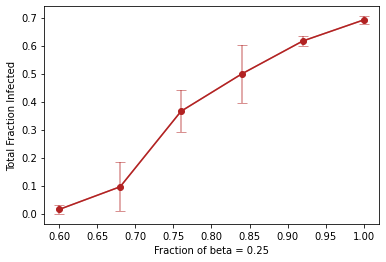

In [7]:
def no_testing_masking():
    
    avg_at_end = []
    std_at_end = []
    
    for beta in betafiles:  # For each beta 
        
        many_runs = split_test_rate(split_start_at(beta,10),0)
        
        temp_file = np.genfromtxt(many_runs[0])
        
        avg = np.zeros(len(temp_file))
        std = np.zeros((len(temp_file),len(many_runs)))
        
        for i in range(len(many_runs)):  # For each run
            
            file = np.genfromtxt(many_runs[i]) # Get data from file
            
            asym_infected = file[:,R] + file[:,A] + file[:,P] + file[:,MI] + file[:,SI] + file[:,H] # All recovered plus leftover infected at 365 days (ideally 0)
            
            avg += asym_infected       # Add it to an "average" array
            std[:,i] = asym_infected   # Add a column to an std array
            
        avg = avg/len(many_runs)/n_pop # Make avg average again
        
        std_array = np.std(std,axis=1)/n_pop # also make it a fraction of n_pop
        
        avg_at_end.append(avg[-1])
        std_at_end.append(std_array[-1])
        
    plt.plot(np.array(betas)/0.25,avg_at_end,'-o',color='firebrick')
    plt.errorbar( np.array(betas)/0.25, avg_at_end , yerr=std_at_end,color='firebrick',solid_capstyle='projecting', capsize=5,alpha=0.5)
    plt.xlabel("Fraction of beta = 0.25")
    plt.ylabel("Total Fraction Infected")

no_testing_masking()       

In [8]:
def masking_with_testing(beta_val):
    
    if(len(betas[betas==beta_val])==0):
        print("Invalid choice of beta!")
        return
    
    colors = ["navy", "royalblue","mediumorchid","darkmagenta","mediumvioletred","crimson"]
    
    avg_at_end = []
    std_at_end = []
    
    b_index = np.where(betas==beta_val)[0][0]
    
    # betafiles[b_index]  are all runs with beta = beta_val
    
    dtrs = np.array([0,0.1,0.2,0.3,0.4,0.5])
    
    for dtr in dtrs:  # For each testing rate
        
        many_runs = split_test_rate(split_start_at(betafiles[b_index],10),dtr)
        ## This could just be a function....
        temp_file = np.genfromtxt(many_runs[0])
        
        avg = np.zeros(len(temp_file))
        std = np.zeros((len(temp_file),len(many_runs)))
        
        for i in range(len(many_runs)):  # For each run
            
            file = np.genfromtxt(many_runs[i]) # Get data from file
            
            asym_infected = file[:,R] + file[:,A] + file[:,P] + file[:,MI] + file[:,SI] + file[:,H] # All recovered plus leftover infected at 365 days (ideally 0)
            
            if(dtr==0):
                if(asym_infected[-1]<100):
                    print(many_runs[i])
            
            avg += asym_infected       # Add it to an "average" array
            std[:,i] = asym_infected   # Add a column to an std array
            
        avg = avg/len(many_runs)/n_pop # Make avg average again
        
        std_array = np.std(std,axis=1)/n_pop # also make it a fraction of n_pop
        
        avg_at_end.append(avg[-1])
        std_at_end.append(std_array[-1])
        
        ## Up to here
        
    plt.plot(dtrs,avg_at_end,'-o',color=colors[b_index], label=str(100-int((beta_val/0.25)*100))+"% reduction in transmission")
    plt.errorbar(dtrs, avg_at_end , yerr=std_at_end,color=colors[b_index],solid_capstyle='projecting', capsize=5,alpha=0.5)
    plt.xlabel("Daily Testing Rates (% of population)")
    plt.ylabel("Total Fraction Infected")
        
    

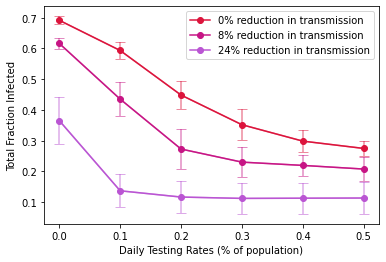

In [9]:
masking_with_testing(0.25)
masking_with_testing(0.23)
masking_with_testing(0.19)
plt.legend()

In [10]:
def testing_starting_later(start_at):
    
    starts = np.array([5,10,20])
    
    if(len(starts[starts==start_at])==0):
        print("Invalid choice of start fraction!")
        return
    
    start_index = np.where(starts==start_at)[0][0]
    
#     colors = ["forestgreen", "mediumseagreen","mediumspringgreen","turquoise","palegreen","greenyellow"]
    
    colors = ["forestgreen","darkgoldenrod","firebrick"]
    
    avg_at_end = []
    std_at_end = []
    
    b_index = np.where(betas==0.25)[0][0] # Get index when beta = 0.25
    
    # betafiles[b_index]  are all runs with beta = beta_val
    
    dtrs = np.array([0,0.1,0.2,0.3,0.4,0.5])
    
    for dtr in dtrs:  # For each testing rate
        
        many_runs = split_test_rate(split_start_at(betafiles[b_index],start_at),dtr)
        ## This could just be a function....
        temp_file = np.genfromtxt(many_runs[0])
        
        avg = np.zeros(len(temp_file))
        std = np.zeros((len(temp_file),len(many_runs)))
        
        for i in range(len(many_runs)):  # For each run
            
            file = np.genfromtxt(many_runs[i]) # Get data from file
            
            asym_infected = file[:,R] + file[:,A] + file[:,P] + file[:,MI] + file[:,SI] + file[:,H] # All recovered plus leftover infected at 365 days (ideally 0)
            
            avg += asym_infected       # Add it to an "average" array
            std[:,i] = asym_infected   # Add a column to an std array
            
        avg = avg/len(many_runs)/n_pop # Make avg average again
        
        std_array = np.std(std,axis=1)/n_pop # also make it a fraction of n_pop
        
        avg_at_end.append(avg[-1])
        std_at_end.append(std_array[-1])
        
        ## Up to here
        
    plt.plot(dtrs,avg_at_end,'-o',color=colors[start_index], label="Testing starting at "+str(start_at)+"% rec")
    plt.errorbar(dtrs, avg_at_end , yerr=std_at_end,color=colors[start_index],solid_capstyle='projecting', capsize=5,alpha=0.5)
    plt.xlabel("Daily Testing Rates (% of population)")
    plt.ylabel("Total Fraction Infected")

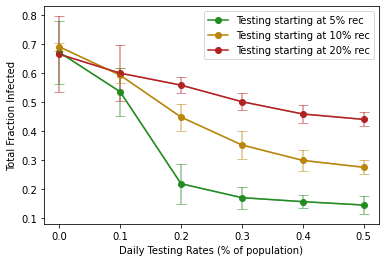

In [18]:
# plt.title("Start testing at different fractions of recovered")
testing_starting_later(5)
testing_starting_later(10)
testing_starting_later(20)
plt.legend()
# plt.ylim(0,1)
plt.savefig("comparing_starting_later.png",dpi=500,facecolor='w')

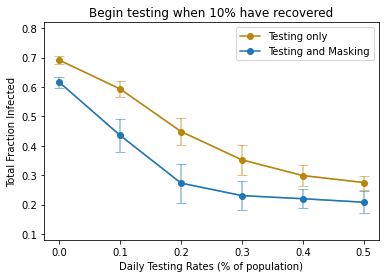

In [22]:
testing_starting_later_10(10)
masking_with_testing_10(0.23)
# testing_starting_later(5)

# testing_starting_later(20)

plt.title("Begin testing when "+str(10)+"% have recovered")

# plt.text(0.03, 0.65, "No masking,\n    no testing")
# plt.text(0.0, 0.5, "Masking,\n no testing")

# plt.text(0.1, 0.16, "Masking and testing")
# plt.text(0.25, 0.45, "No masking with testing")

plt.legend()
plt.ylim(0.08,0.82)
plt.savefig("NEW_comparing_effects_of_masking.png",dpi=500,facecolor='w')

In [16]:
# no_testing_masking()   

In [13]:
def testing_starting_later_10(start_at):
    
    starts = np.array([5,10,20])
    
    if(len(starts[starts==start_at])==0):
        print("Invalid choice of start fraction!")
        return
    
    start_index = np.where(starts==start_at)[0][0]
    
#     colors = ["forestgreen", "mediumseagreen","mediumspringgreen","turquoise","palegreen","greenyellow"]
    
    colors = ["forestgreen","darkgoldenrod","firebrick"]
    
    avg_at_end = []
    std_at_end = []
    
    b_index = np.where(betas==0.25)[0][0] # Get index when beta = 0.25
    
    # betafiles[b_index]  are all runs with beta = beta_val
    
    dtrs = np.array([0,0.1,0.2,0.3,0.4,0.5])
    
    for dtr in dtrs:  # For each testing rate
        
        many_runs = split_test_rate(split_start_at(betafiles[b_index],start_at),dtr)
        ## This could just be a function....
        temp_file = np.genfromtxt(many_runs[0])
        
        avg = np.zeros(len(temp_file))
        std = np.zeros((len(temp_file),len(many_runs)))
        
        for i in range(len(many_runs)):  # For each run
            
            file = np.genfromtxt(many_runs[i]) # Get data from file
            
            asym_infected = file[:,R] + file[:,A] + file[:,P] + file[:,MI] + file[:,SI] + file[:,H] # All recovered plus leftover infected at 365 days (ideally 0)
            
            avg += asym_infected       # Add it to an "average" array
            std[:,i] = asym_infected   # Add a column to an std array
            
        avg = avg/len(many_runs)/n_pop # Make avg average again
        
        std_array = np.std(std,axis=1)/n_pop # also make it a fraction of n_pop
        
        avg_at_end.append(avg[-1])
        std_at_end.append(std_array[-1])
        
        ## Up to here
        
    plt.plot(dtrs,avg_at_end,'-o',color=colors[start_index], label="Testing only")
    plt.errorbar(dtrs, avg_at_end , yerr=std_at_end,color=colors[start_index],solid_capstyle='projecting', capsize=5,alpha=0.5)
    plt.xlabel("Daily Testing Rates (% of population)")
    plt.ylabel("Total Fraction Infected")

In [14]:
def masking_with_testing_10(beta_val):
    
    if(len(betas[betas==beta_val])==0):
        print("Invalid choice of beta!")
        return
    
#     colors = ["navy", "royalblue","mediumorchid","darkmagenta","mediumvioletred","crimson"]
    colors = ["navy", "royalblue","mediumorchid","darkmagenta","tab:blue","crimson"]
    
    avg_at_end = []
    std_at_end = []
    
    b_index = np.where(betas==beta_val)[0][0]
    
    # betafiles[b_index]  are all runs with beta = beta_val
    
    dtrs = np.array([0,0.1,0.2,0.3,0.4,0.5])
    
    for dtr in dtrs:  # For each testing rate
        
        many_runs = split_test_rate(split_start_at(betafiles[b_index],10),dtr)
        ## This could just be a function....
        temp_file = np.genfromtxt(many_runs[0])
        
        avg = np.zeros(len(temp_file))
        std = np.zeros((len(temp_file),len(many_runs)))
        
        for i in range(len(many_runs)):  # For each run
            
            file = np.genfromtxt(many_runs[i]) # Get data from file
            
            asym_infected = file[:,R] + file[:,A] + file[:,P] + file[:,MI] + file[:,SI] + file[:,H] # All recovered plus leftover infected at 365 days (ideally 0)
            
            if(dtr==0):
                if(asym_infected[-1]<100):
                    print(many_runs[i])
            
            avg += asym_infected       # Add it to an "average" array
            std[:,i] = asym_infected   # Add a column to an std array
            
        avg = avg/len(many_runs)/n_pop # Make avg average again
        
        std_array = np.std(std,axis=1)/n_pop # also make it a fraction of n_pop
        
        avg_at_end.append(avg[-1])
        std_at_end.append(std_array[-1])
        
        ## Up to here
        
    plt.plot(dtrs,avg_at_end,'-o',color=colors[b_index], label="Testing and Masking")#str(100-int((beta_val/0.25)*100))+"% reduction in transmission")
    plt.errorbar(dtrs, avg_at_end , yerr=std_at_end,color=colors[b_index],solid_capstyle='projecting', capsize=5,alpha=0.5)
    plt.xlabel("Daily Testing Rates (% of population)")
    plt.ylabel("Total Fraction Infected")
        
    

In [34]:
## Plotting histogrms
def histograms(beta_val):
    
    if(len(betas[betas==beta_val])==0):
        print("Invalid choice of beta!")
        return
    
    colors = ["navy", "royalblue","mediumorchid","darkmagenta","mediumvioletred","crimson"]
    
    avg_at_end = []
    std_at_end = []
    
    b_index = np.where(betas==beta_val)[0][0]
    
    # betafiles[b_index]  are all runs with beta = beta_val
    
#     dtrs = np.array([0,0.1,0.2,0.3,0.4,0.5])
    dtrs = np.array([0])
    
    for dtr in dtrs:  # For each testing rate
        
        many_runs = split_test_rate(split_start_at(betafiles[b_index],10),dtr)
        ## This could just be a function....
        temp_file = np.genfromtxt(many_runs[0])
        
        avg = np.zeros(len(temp_file))
        std = np.zeros((len(temp_file),len(many_runs)))
        
        for i in range(len(many_runs)):  # For each run
            
            file = np.genfromtxt(many_runs[i]) # Get data from file
            
            asym_infected = file[:,R] + file[:,A] + file[:,P] + file[:,MI] + file[:,SI] + file[:,H] # All recovered plus leftover infected at 365 days (ideally 0)
            
            if(dtr==0):
                if(asym_infected[-1]<100):
                    print(many_runs[i])
            
            avg += asym_infected       # Add it to an "average" array
            std[:,i] = asym_infected   # Add a column to an std array
            
        avg = avg/len(many_runs)/n_pop # Make avg average again
        
#         std_array = np.std(std,axis=1)/n_pop # also make it a fraction of n_pop
        
#         avg_at_end.append(avg[-1])
#         std_at_end.append(std_array[-1])
        
        ## Up to here
        
#     plt.plot(dtrs,avg_at_end,'-o',color=colors[b_index], label=str(100-int((beta_val/0.25)*100))+"% reduction in transmission")
#     plt.errorbar(dtrs, avg_at_end , yerr=std_at_end,color=colors[b_index],solid_capstyle='projecting', capsize=5,alpha=0.5)
#     plt.xlabel("Daily Testing Rates (% of population)")
#     plt.ylabel("Total Fraction Infected")
    
    plt.hist(std[-1]/n_pop,alpha=0.5,label=r"$\beta$ = "+str(beta_val)+", Avg ="+str(round(avg[-1],2)))
        
    

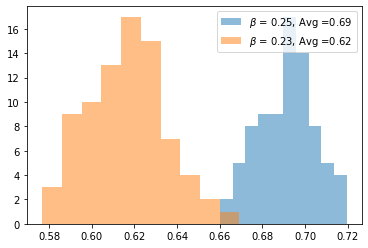

In [35]:
histograms(0.25)
histograms(0.23)
plt.legend()